In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

if os.getcwd()[-7:] == 'AAM_Sim':
    print(os.getcwd())
else:
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    print(os.getcwd())
    
from Engine.GlobalClock import GlobalClock, Agent
from Engine.State import State
from Engine.Aircraft import AircraftType
from Engine.FlightPlan import FlightPlan
from Engine.MultiRotorController import MultiRotorController
from Engine.Wind import WindField
from Engine.Sensors import NavUpdate, GPSPosNavUpdate
from Engine.DragModel import DragModel
from Engine.TrackingSystem import *

from CrossPlatformDev import my_print, join_str

import time

C:\Users\quekz\PycharmProjects\AAM_Sim


In [2]:
from MonteCarlo.TwoAircraftEncounter.ScenarioMP import simulate_encounter_debug


run = 0

start = time.time()
AC1_GT_Trajectory, AC2_GT_Trajectory, AC1_Trk_Trajectory, AC2_Trk_Trajectory, AC1_WPTs, AC2_WPTs = simulate_encounter_debug(run)


end = time.time()
compute_time = end-start
simulated_time = AC1_GT_Trajectory.iloc[-1]['time'] + AC2_GT_Trajectory.iloc[-1]['time']
speedup = simulated_time/compute_time

print('Simulation took: %.3f sec, simulated flight time: %.3f sec, total speedup: %.3f times'
      %(compute_time, simulated_time, speedup))

CHANGE FLIGHT LEG
Next Wpt is:  [6.08070395e-15 9.93054316e+01 0.00000000e+00]
Hdg is:  [9.18485099e-15 1.50000000e+02 0.00000000e+00]
CHANGE FLIGHT LEG
Next Wpt is:  [99.46641362  0.          0.        ]
Hdg is:  [150.   0.   0.]
CHANGE FLIGHT LEG
Next Wpt is:  [249.46641362   0.           0.        ]
Hdg is:  [150.   0.   0.]
CHANGE FLIGHT LEG
Next Wpt is:  [1.52655549e-14 2.49305432e+02 0.00000000e+00]
Hdg is:  [9.18485099e-15 1.50000000e+02 0.00000000e+00]
CHANGE FLIGHT LEG
Next Wpt is:  [399.46641362   0.           0.        ]
Hdg is:  [150.   0.   0.]
CHANGE FLIGHT LEG
Next Wpt is:  [2.44504059e-14 3.99305432e+02 0.00000000e+00]
Hdg is:  [9.18485099e-15 1.50000000e+02 0.00000000e+00]
CHANGE FLIGHT LEG
Final WPT reached
Final WPT reached
Final WPT reached
Final WPT reached
Final WPT reached
Final WPT reached
Final WPT reached
Final WPT reached
Final WPT reached
Final WPT reached
Final WPT reached
Final WPT reached
Final WPT reached
Final WPT reached
Final WPT reached
Final WPT rea

In [3]:
def special_concat(trajectory):
    return np.concatenate(trajectory).reshape(len(trajectory), 8) # 8 is the length of each mini array

def extract_from_df(df, key, idx):
    """Extracts single column from df cells with 3D point values. """
    df_len = len(df)
    return np.concatenate(df[key].to_numpy()).reshape(df_len, 3)[:,idx]

<IPython.core.display.Javascript object>


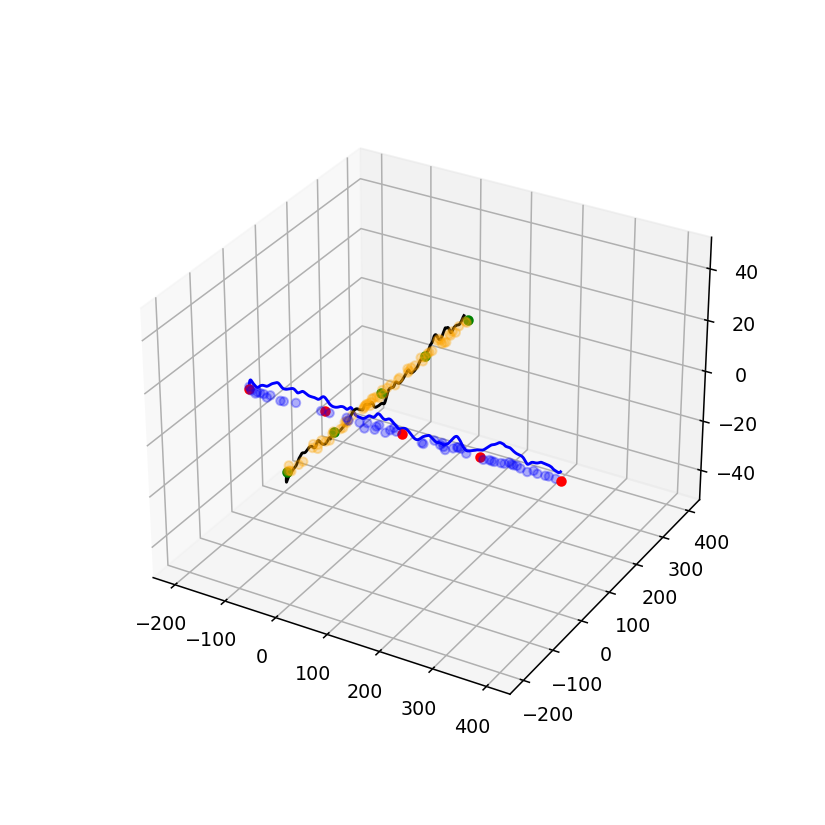

[-200.53358638    0.            0.        ]
[-50.53358638   0.           0.        ]
[99.46641362  0.          0.        ]
[249.46641362   0.           0.        ]
[399.46641362   0.           0.        ]
[-1.22889980e-14 -2.00694568e+02  0.00000000e+00]
[-3.10414705e-15 -5.06945684e+01  0.00000000e+00]
[6.08070395e-15 9.93054316e+01 0.00000000e+00]
[1.52655549e-14 2.49305432e+02 0.00000000e+00]
[2.44504059e-14 3.99305432e+02 0.00000000e+00]


In [18]:
%matplotlib notebook

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

ax.plot(extract_from_df(AC1_GT_Trajectory, 'gt_pos', 0), 
           extract_from_df(AC1_GT_Trajectory, 'gt_pos', 1), 
           extract_from_df(AC1_GT_Trajectory, 'gt_pos', 2), c='b')

ax.plot(extract_from_df(AC2_GT_Trajectory, 'gt_pos', 0), 
           extract_from_df(AC2_GT_Trajectory, 'gt_pos', 1), 
           extract_from_df(AC2_GT_Trajectory, 'gt_pos', 2), c='black')

ax.scatter(AC1_Trk_Trajectory[:,2], 
           AC1_Trk_Trajectory[:,3],
           AC1_Trk_Trajectory[:,4], c='b', alpha=0.3)

ax.scatter(AC2_Trk_Trajectory[:,2], 
           AC2_Trk_Trajectory[:,3],
           AC2_Trk_Trajectory[:,4], c='orange', alpha=0.3)

for wpt in AC1_WPTs:
    xx, yy, zz = wpt
    ax.scatter(xx, yy, zz, c='r')
    print(wpt)

for wpt in AC2_WPTs:
    xx, yy, zz = wpt
    ax.scatter(xx, yy, zz, c='g')
    print(wpt)


    
# ax.set_xlim(-10, 510)
# ax.set_ylim(-100, 100)
ax.set_zlim(-50,50)

plt.show()